In [ ]:
# Install packages

# !pip install pandas
# !pip install numpy
# !pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap


In [ ]:
# Set up Google Drive connection
from google.colab import drive
drive.mount("/content/drive")

project_dir = '/content/drive/MyDrive/Research/Eco STEM/SOS/Fall 25'

Mounted at /content/drive


In [ ]:
# Read in data

sos_fall_values_survey_df = pd.read_csv(f'{project_dir}/sos-values_fall-2025.csv')

In [ ]:
# Reports to generate
# [x] Overall scores on all the questions (mean, std) (horizontal violin plot?)
# [X] Responses by major
# [X] By major, scores on all the questions (mean, std)
# [X] Demographics of interest by major: parents' education,
# days on campus, commute length, live with people who raised you, childcare
# responsibilities, LGBTQ+, transgender, income
# [ ] Some sort of wordcloud or LLM summarization of free-responses

Q_ID_TO_SOS_LABEL = {
    'Q1_1': 'VC1',
    'Q1_2': 'VC2',
    'Q1_3': 'VC3',
    'Q1_4': 'VC4',
    'Q5_1': 'VS1',
    'Q5_2': 'VS2',
    'Q5_3': 'VS3',
    'Q5_4': 'VS4',
    'Q5_5': 'VS5',
    'Q10_1': 'VV1',
    'Q10_2': 'VV2',
    'Q10_3': 'VV3',
    'Q10_4': 'VV4',
    'Q10_5': 'VV5',
    'Q10_6': 'VV6',
}

SOS_LABEL_TO_TEXT = {
    'VC1': '...helps you feel comfortable asking questions and making comments in class?',
    'VC2': '...believes in your ability to learn and  succeed?',
    'VC3': '...makes you feel like part of the classroom community?',
    'VC4': '...values you for what you bring to class through your own personal experiences, inside and outside of class?',
    'VS1': '...clearly explains what you are expected to learn in the class?',
    'VS2': '...clearly explains the work to be done on all assignments/activities?',
    'VS3': '...provides assignments/activities that are useful in helping you learn the course material?',
    'VS4': '...provides feedback that is helpful for your learning?',
    'VS5': '...makes the class challenging in a way that is just right?',
    'VV1': '...is excited about the subject and shares this excitement with the class?',
    'VV2': '...uses in-class problem solving, and other interactive approaches?',
    'VV3': '...creates an environment where you interact with and learn from other students?',
    'VV4': '...encourages students to think critically and question assumptions?',
    'VV5': '...relates the course material to real-world applications?',
    'VV6': '...encourages students to take time to reflect on their own learning?',
}

SOS_LABEL_CATEGORIES = {
    'CLIMATE': ['VC1','VC2','VC3','VC4',],
    'STRUCTURE': ['VS1','VS2','VS3','VS4','VS5'],
    'VIBRANCY': ['VV1','VV2','VV3','VV4','VV5','VV6']
}

LIKERT_TEXT_TO_VAL = {
    'Extremely important': 5,
    'Very important': 4,
    'Moderately important': 3,
    'Slightly important': 2,
    'Not at all important': 1,
}

Q_ID_TO_DEMOGRAPHIC_LABELS = {
    'Q1': 'UNDERGRAD-GRAD',
    'Q3': 'YEARS_AT_CSULA',
    'Q4': 'PARENTS_EDUCATION',
    'Q5': 'CAMPUS_OFF_CAMPUS',
    'Q6': 'DAYS_ON_CAMPUS',
    'Q7': 'EMPLOYMENT',
    'Q2.1': 'CHILDCARE',
    'Q1.2': 'COMMUTE_LENGTH',
    'Q2.2': 'MAJOR',
    'Q1.5': 'RACE_ETHNICITY',
    'Q2.4': 'HOUSEHOLD_INCOME',
    'Q3.2': 'DISABILITY',
    'Q6.1': 'LGBTQIA',
    'Q7.1': 'TRANSGENDER',
    'Q8.2': 'GENDER_IDENTITY'
}

HOUSEHOLD_INCOME_ORDER = [
    'Prefer not to say',
    'Unsure',
    '< $25,000 / year',
    '$25,000 - $50,000 / year',
    '$50,000 - $75,000 / year',
    '$75,000 - $100,000 / year',
    '$100,000 - $125,000 / year',
    '$125,000 - $150,000 / year',
    '> $150,000 / year'
]

COMMUTE_LENGTH_ORDER = [
    'Less than 30 mins',
    'Between 30 mins and 1 hr',
    'Between 1 hr and 2 hrs',
    'More than 2 hrs'
]

EMPLOYMENT_ORDER = [
    'Not employed',
    'Employed part-time: less than 10 hours per week',
    'Employed part-time: 10-20 hours per week',
    'Employed part-time: 20-30 hours per week',
    'Employed part-time: 30-40 hours per week',
    'Employed full-time: 40+ hours per week',
]

PARENTS_EDUCATION_ORDER = [
    'Prefer not to say',
    'Unsure',
    'I do not have a parent with any college experience',
    'I do not have a parent who has received at least a 4-year college degree, but I have a parent who attended some college',
    'I have a parent who has received at least a 4-year college degree'
]

/tmp/ipython-input-3345772535.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sos_responses.rename(columns=Q_ID_TO_SOS_LABEL, inplace=True)
/tmp/ipython-input-3345772535.py:78: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sos_responses.replace(LIKERT_TEXT_TO_VAL, inplace=True)
/tmp/ipython-input-3345772535.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sos_responses.rena

=========== RACE/ETHNICITY: Hispanic / Latinx ===========
VC1	4.47	0.72	121	0
VC2	4.38	0.77	121	0
VC3	4.09	0.89	120	1
VC4	3.76	1.04	119	2
VS1	4.61	0.6	116	5
VS2	4.63	0.58	117	4
VS3	4.66	0.53	116	5
VS4	4.59	0.6	116	5
VS5	3.97	0.89	116	5
VV1	4.32	0.8	120	1
VV2	4.35	0.75	121	0
VV3	4.01	1.02	121	0
VV4	4.26	0.78	121	0
VV5	4.43	0.69	120	1
VV6	4.09	0.85	117	4


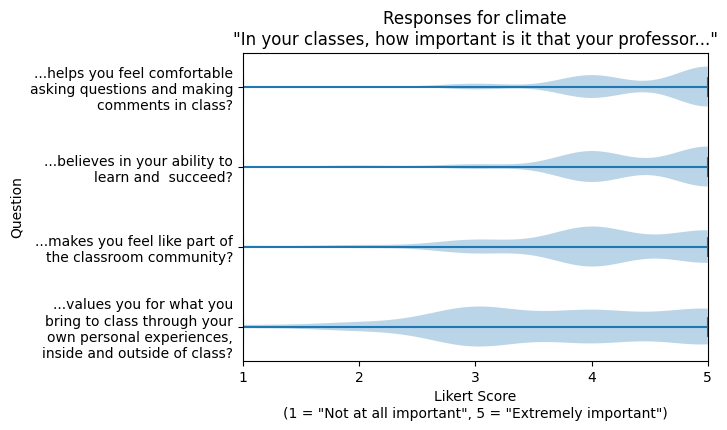

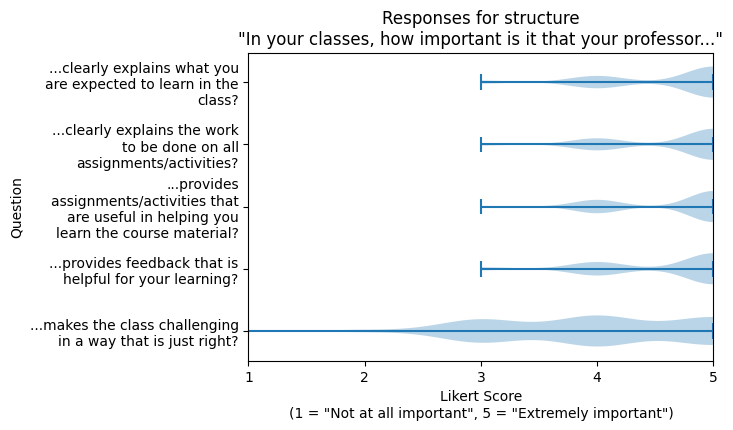

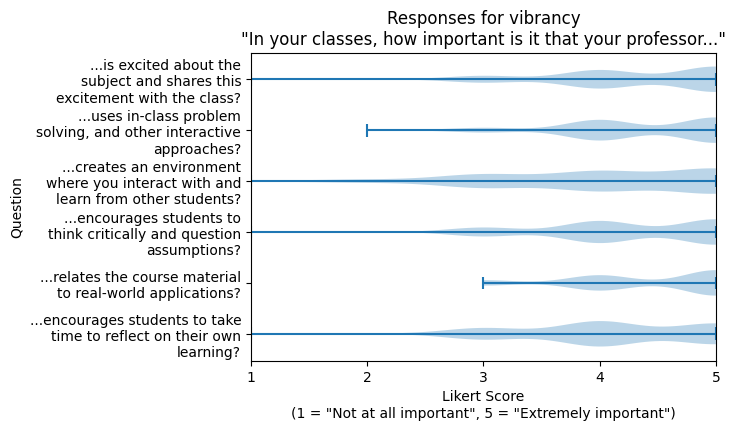

=========== RACE/ETHNICITY: Asian / Asian American ===========
VC1	4.21	0.71	24	0
VC2	4.17	0.9	24	0
VC3	3.62	1.18	24	0
VC4	3.58	1.04	24	0
VS1	4.42	0.7	24	0
VS2	4.57	0.5	23	1
VS3	4.54	0.64	24	0
VS4	4.42	0.57	24	0
VS5	3.62	1.03	24	0
VV1	3.67	0.8	24	0
VV2	4.04	0.79	24	0
VV3	3.33	1.31	24	0
VV4	4.0	0.82	24	0
VV5	4.25	0.97	24	0
VV6	3.79	1.04	24	0


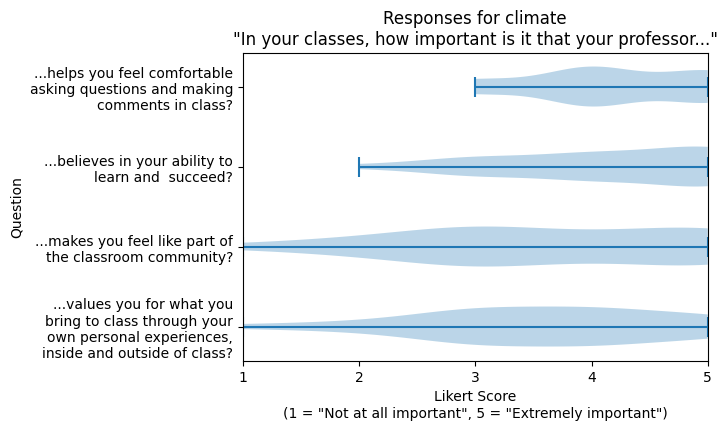

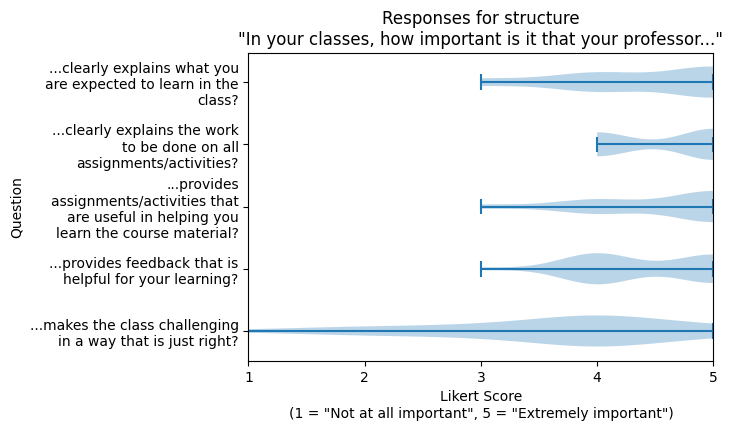

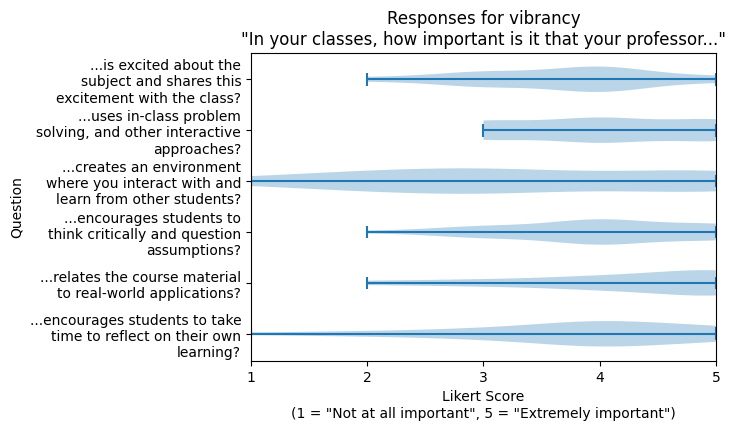

=========== RACE/ETHNICITY: Prefer not to say ===========
VC1	3.8	0.98	5	0
VC2	4.0	0.63	5	0
VC3	3.8	1.17	5	0
VC4	3.0	1.1	5	0
VS1	4.25	0.83	4	1
VS2	4.25	0.83	4	1
VS3	4.5	0.87	4	1
VS4	4.25	0.83	4	1
VS5	3.5	1.12	4	1
VV1	3.8	1.47	5	0
VV2	4.0	0.63	5	0
VV3	3.2	0.98	5	0
VV4	4.2	0.75	5	0
VV5	4.0	1.1	5	0
VV6	4.4	0.8	5	0


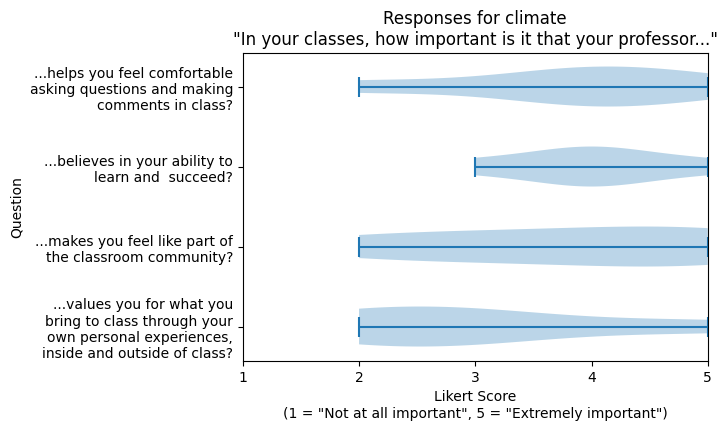

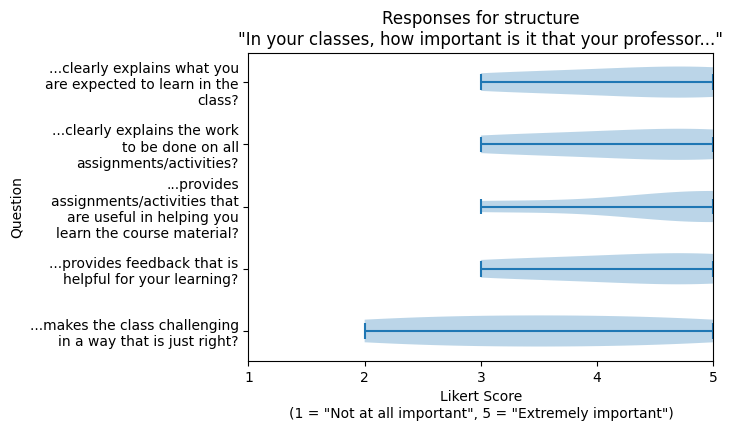

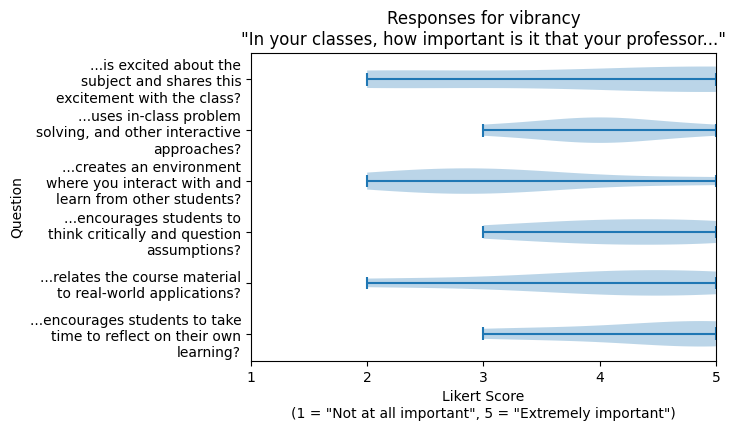

=========== RACE/ETHNICITY: African American / Black ===========
VC1	4.25	0.83	4	0
VC2	4.75	0.43	4	0
VC3	4.5	0.5	4	0
VC4	4.25	0.83	4	0
VS1	4.5	0.5	4	0
VS2	4.75	0.43	4	0
VS3	4.5	0.5	4	0
VS4	4.5	0.5	4	0
VS5	4.25	0.83	4	0
VV1	4.5	0.5	4	0
VV2	4.5	0.5	4	0
VV3	4.5	0.5	4	0
VV4	4.75	0.43	4	0
VV5	4.75	0.43	4	0
VV6	4.0	1.22	4	0


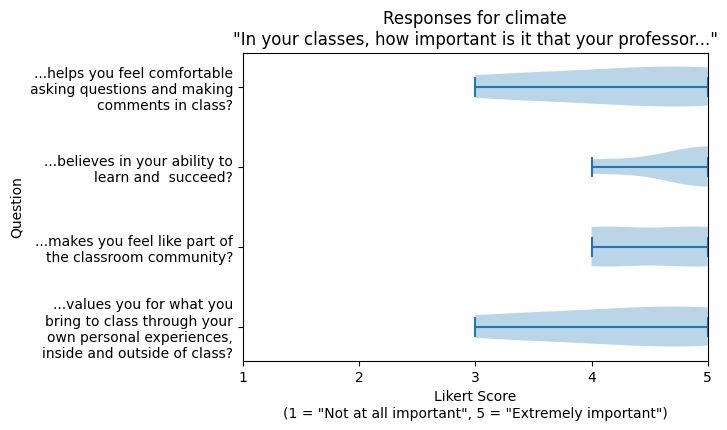

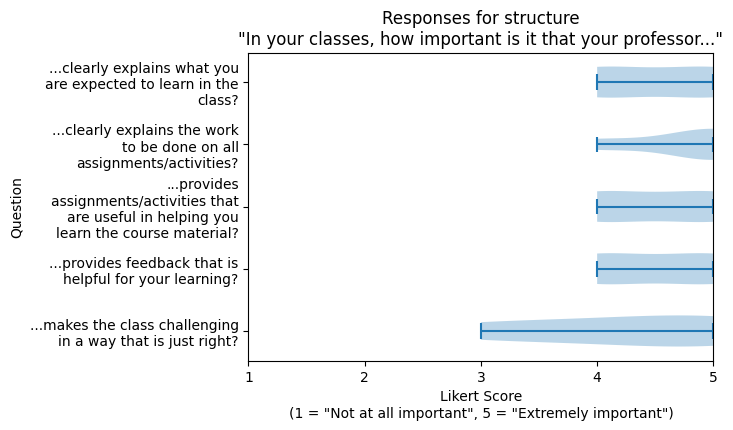

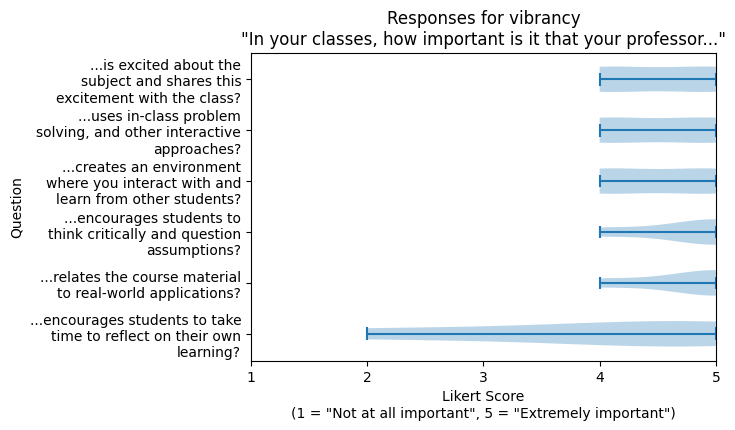

=========== RACE/ETHNICITY: Middle Eastern / North African ===========
VC1	4.0	0.0	1	0
VC2	4.0	0.0	1	0
VC3	4.0	0.0	1	0
VC4	4.0	0.0	1	0
VS1	4.0	0.0	1	0
VS2	4.0	0.0	1	0
VS3	4.0	0.0	1	0
VS4	4.0	0.0	1	0
VS5	4.0	0.0	1	0
VV1	4.0	0.0	1	0
VV2	4.0	0.0	1	0
VV3	4.0	0.0	1	0
VV4	4.0	0.0	1	0
VV5	4.0	0.0	1	0
VV6	4.0	0.0	1	0


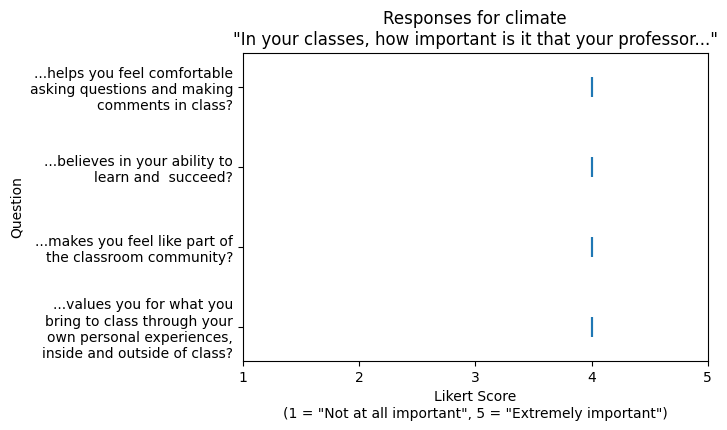

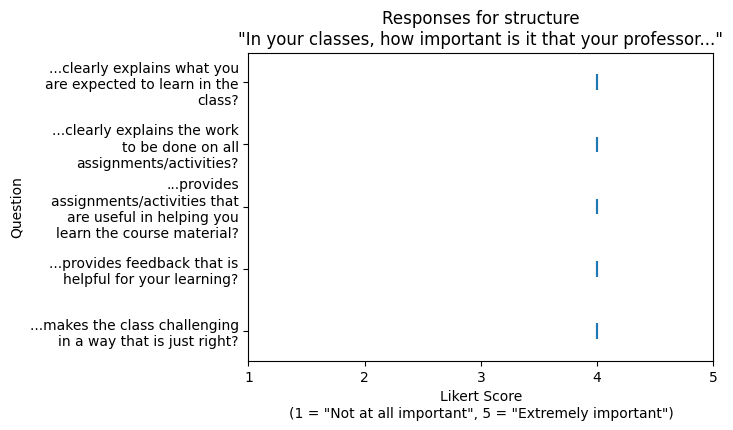

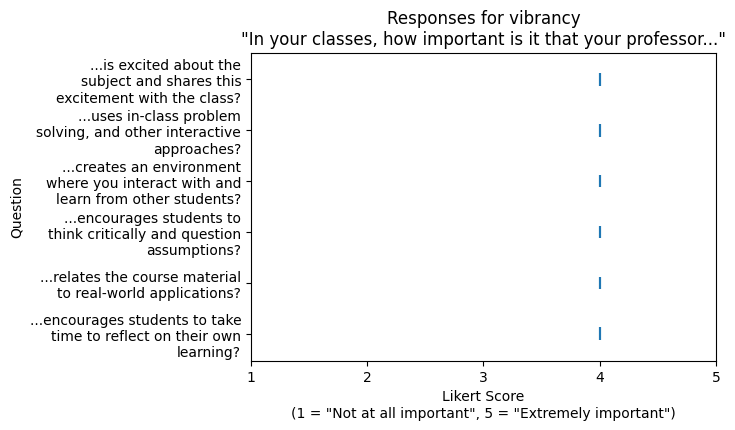

=========== RACE/ETHNICITY: Hispanic / Latinx,White / European ===========
VC1	4.57	0.49	7	0
VC2	4.14	1.36	7	0
VC3	4.0	1.31	7	0
VC4	4.0	0.93	7	0
VS1	4.67	0.75	6	1
VS2	4.83	0.37	6	1
VS3	4.83	0.37	6	1
VS4	4.83	0.37	6	1
VS5	4.5	0.5	6	1
VV1	4.5	0.5	6	1
VV2	4.83	0.37	6	1
VV3	4.33	0.94	6	1
VV4	4.33	0.75	6	1
VV5	4.67	0.47	6	1
VV6	4.33	0.75	6	1


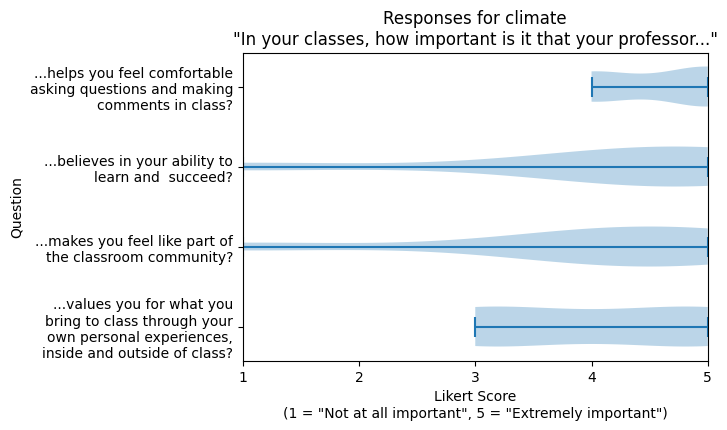

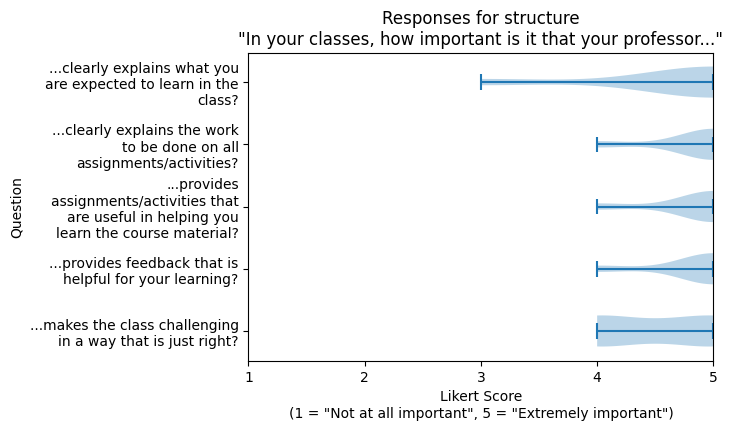

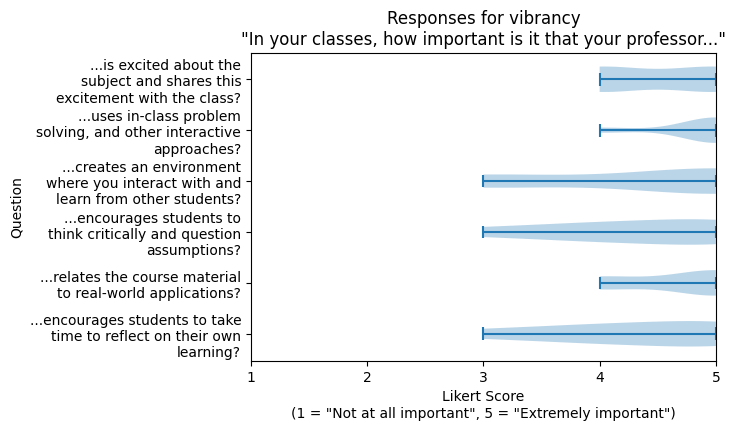

=========== RACE/ETHNICITY: White / European ===========
VC1	4.5	0.5	6	0
VC2	4.67	0.47	6	0
VC3	4.17	0.69	6	0
VC4	4.17	0.69	6	0
VS1	5.0	0.0	4	2
VS2	4.6	0.49	5	1
VS3	4.6	0.49	5	1
VS4	4.6	0.49	5	1
VS5	3.8	0.75	5	1
VV1	4.17	0.69	6	0
VV2	4.33	0.75	6	0
VV3	4.0	1.0	6	0
VV4	4.17	0.69	6	0
VV5	4.17	0.69	6	0
VV6	4.17	0.9	6	0


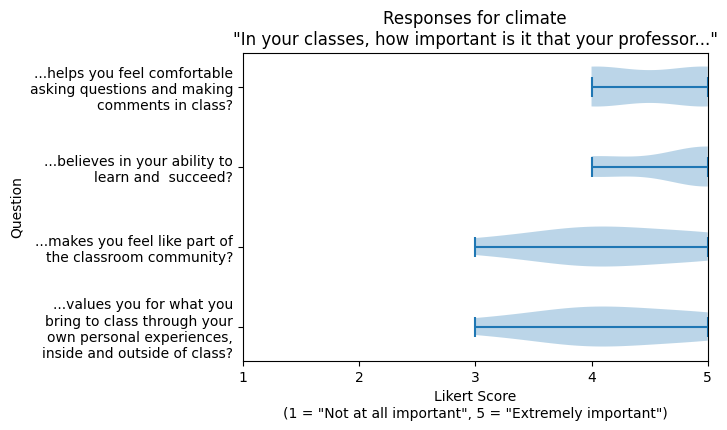

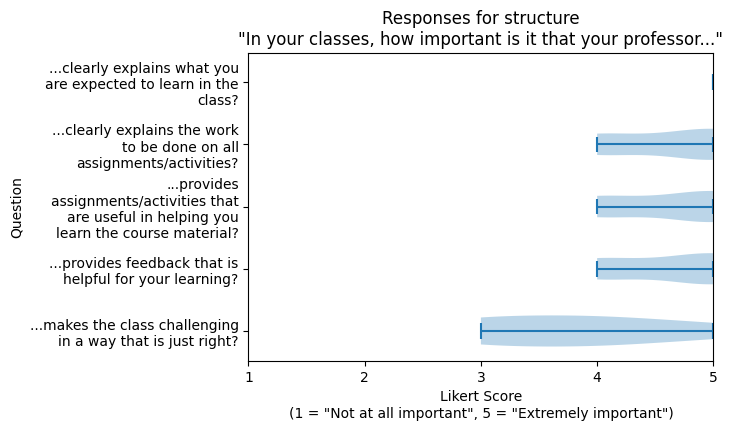

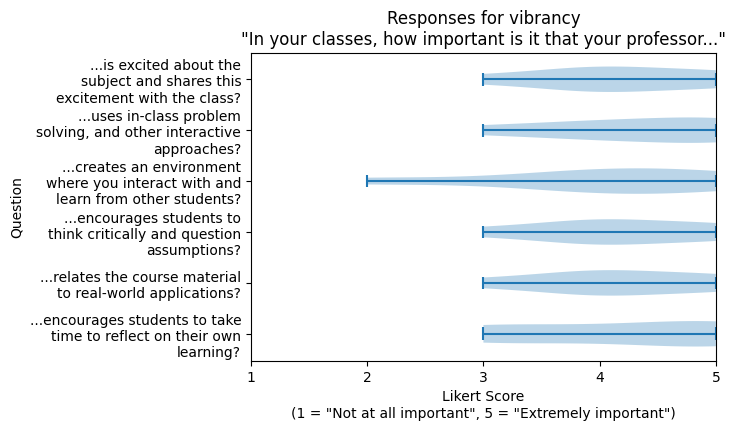

=========== RACE/ETHNICITY: Hispanic / Latinx,Other ===========


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
def demographics_all_majors_df(survey_df):
  df_valid_response = survey_df[survey_df['DistributionChannel'] == 'anonymous'].copy()
  df_valid_response = df_valid_response[2:]
  df_demo_responses = df_valid_response[list(Q_ID_TO_DEMOGRAPHIC_LABELS.keys())]
  df_demo_responses.rename(columns=Q_ID_TO_DEMOGRAPHIC_LABELS, inplace=True)
  return df_demo_responses

def demographics_by_major_dfs(demographics_all_majors_df):
  majors = demographics_all_majors_df.dropna(subset = ['MAJOR'])['MAJOR'].unique()
  demo_df_by_major = { major: demographics_all_majors_df[demographics_all_majors_df['MAJOR'] == major] for major in majors }
  return demo_df_by_major

def scores_all_majors_df(survey_df):
  '''
  Return a dataframe of only the SOS questions and values as numbers.

  :param survey_df: The entire dataframe of survey data from Qualtrics.
  '''
  df_valid_response = survey_df[survey_df['DistributionChannel'] == 'anonymous'].copy()
  df_sos_responses = survey_df[list(Q_ID_TO_SOS_LABEL.keys())]
  df_sos_responses.rename(columns=Q_ID_TO_SOS_LABEL, inplace=True)
  # Drop question text and qualtrics question id
  df_sos_responses = df_sos_responses[2:]
  df_sos_responses.replace(LIKERT_TEXT_TO_VAL, inplace=True)
  nan_df = df_sos_responses.isnull()
  all_nan_df = nan_df.sum(axis=1)
  all_nan_rows = all_nan_df[all_nan_df == df.shape[1]].index
  return df_sos_responses.drop(list(all_nan_rows))

def survey_by_major_dfs(survey_df):
  '''
  Split the entire survey dataframe into dataframes keyed on the student major.
  '''
  df_valid_response = survey_df[survey_df['DistributionChannel'] == 'anonymous'].copy()
  df_valid_response = df_valid_response[2:]
  majors = df_valid_response.dropna(subset = ['Q2.2'])['Q2.2'].unique()
  survey_df_by_major = { major: df_valid_response[df_valid_response['Q2.2'] == major] for major in majors }
  return survey_df_by_major

def survey_by_race_eth_dfs(survey_df):
  '''
  Split the entire survey dataframe into dataframes keyed on the student race/ethnicity.
  '''
  df_valid_response = survey_df[survey_df['DistributionChannel'] == 'anonymous'].copy()
  df_valid_response = df_valid_response[2:]
  race_eths = df_valid_response.dropna(subset = ['Q1.5'])['Q1.5'].unique()
  survey_df_by_race_eth = { race_eth: df_valid_response[df_valid_response['Q1.5'] == race_eth] for race_eth in race_eths }
  return survey_df_by_race_eth

def survey_by_gender_id_dfs(survey_df):
  '''
  Split the entire survey dataframe into dataframes keyed on the student gender identity.
  '''
  df_valid_response = survey_df[survey_df['DistributionChannel'] == 'anonymous'].copy()
  df_valid_response = df_valid_response[2:]
  gender_ids = df_valid_response.dropna(subset = ['Q8.2'])['Q8.2'].unique()
  survey_df_by_gender_id = { gender_id: df_valid_response[df_valid_response['Q8.2'] == gender_id] for gender_id in gender_ids }
  return survey_df_by_gender_id

def scores_by_major_dfs(survey_major_dfs):
  scores_by_major = { major: None for major in survey_major_dfs.keys() }
  for major, df in survey_major_dfs.items():
    df_sos_responses = df[list(Q_ID_TO_SOS_LABEL.keys())]
    df_sos_responses.rename(columns=Q_ID_TO_SOS_LABEL, inplace=True)
    # Drop question text and qualtrics question id
    df_sos_responses = df_sos_responses[2:]
    df_sos_responses.replace(LIKERT_TEXT_TO_VAL, inplace=True)
    scores_by_major[major] = df_sos_responses
  return scores_by_major

def scores_by_race_eth_dfs(survey_race_eth_dfs):
  scores_by_race_eth = { race_eth: None for race_eth in survey_race_eth_dfs.keys() }
  for race_eth, df in survey_race_eth_dfs.items():
    df_sos_responses = df[list(Q_ID_TO_SOS_LABEL.keys())]
    df_sos_responses.rename(columns=Q_ID_TO_SOS_LABEL, inplace=True)
    # Drop question text and qualtrics question id
    df_sos_responses = df_sos_responses[2:]
    df_sos_responses.replace(LIKERT_TEXT_TO_VAL, inplace=True)
    scores_by_race_eth[race_eth] = df_sos_responses
  return scores_by_race_eth

def scores_by_gender_id_dfs(survey_gender_id_dfs):
  scores_by_gender_id = { gender_id: None for gender_id in survey_gender_id_dfs.keys() }
  for gender_id, df in survey_gender_id_dfs.items():
    df_sos_responses = df[list(Q_ID_TO_SOS_LABEL.keys())]
    df_sos_responses.rename(columns=Q_ID_TO_SOS_LABEL, inplace=True)
    # Drop question text and qualtrics question id
    df_sos_responses = df_sos_responses[2:]
    df_sos_responses.replace(LIKERT_TEXT_TO_VAL, inplace=True)
    scores_by_gender_id[gender_id] = df_sos_responses
  return scores_by_gender_id

def sos_scores(scores_df):
  '''
  Calculate the SOS scores per-item for a dataframe.

  :param scores_df: The scores dataframe of survey data from Qualtrics (just
  the SOS questions and their numeric responses).
  '''
  score_vec_by_q = { col: np.array(scores_df[col]) for col in scores_df.columns }
  num_nan_per_q = { q_id: np.count_nonzero(np.isnan(score_vec)) for q_id, score_vec in score_vec_by_q.items() }
  score_vec_by_q_no_nan = { q_id: score_vec[~np.isnan(score_vec)] for q_id, score_vec in score_vec_by_q.items() }
  score_results_by_q = { q_id: {
      'n': len(score_vec),
      'mean': score_vec.mean(),
      'std': score_vec.std()
  } for q_id, score_vec in score_vec_by_q_no_nan.items() }
  return score_results_by_q, num_nan_per_q

def pretty_print_scores(scores_data):
  print("SOS Values Scores:")
  for sos_id,data in scores_data[0].items():
    print(f'\t- {sos_id}: ({data["mean"]}, {data["std"]}) (n={data["n"]})')
  print(f"Nonanswers per question:")
  for sos_id,count in scores_data[1].items():
    print(f'\t- {sos_id}: {count}')

def print_scores_for_table(scores_data):
  for i in range(len(scores_data[0])):
    sos_id = list(scores_data[0].keys())[i]
    data = scores_data[0][sos_id]
    count = scores_data[1][sos_id]
    print(f'{sos_id}\t{data["mean"].round(2)}\t{data["std"].round(2)}\t{data["n"]}\t{count}')

def graph_counts_histogram(categories, values, xlabel, ylabel, title):
  fix,ax = plt.subplots(figsize=(6,4))
  p = ax.bar(categories, values)
  ax.bar_label(p, values, label_type='center', color='#fff')
  ax.set_xticklabels(categories, rotation=-45, ha='left', fontsize=10)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  plt.show()

def graph_income(demographics_df):
  demo_df = demographics_df.copy()
  incomes = HOUSEHOLD_INCOME_ORDER
  values = [ len(demo_df[demo_df['HOUSEHOLD_INCOME'] == income]) for income in incomes ]
  graph_counts_histogram(
      incomes,
      values,
      'Income',
      'Number of students',
      'Student household income (all majors)'
  )

def graph_disability(demographics_df):
  demo_df = demographics_df.copy()
  disability_states = demo_df.dropna(subset = ['DISABILITY'])['DISABILITY'].unique()
  values = [ len(demo_df[demo_df['DISABILITY'] == state]) for state in disability_states ]
  graph_counts_histogram(
      disability_states,
      values,
      'Disability status',
      'Number of students',
      'Student disability status (all majors)'
  )

def graph_childcare(demographics_df):
  demo_df = demographics_df.copy()
  childcare_states = demo_df.dropna(subset = ['CHILDCARE'])['CHILDCARE'].unique()
  values = [ len(demo_df[demo_df['CHILDCARE'] == state]) for state in childcare_states ]
  graph_counts_histogram(
      childcare_states,
      values,
      'Childcare responsibilities',
      'Number of students',
      'Student childcare responsibilities (all majors)'
  )

def graph_lgbtqia(demographics_df):
  demo_df = demographics_df.copy()
  lgbtqia_states = demo_df.dropna(subset = ['LGBTQIA'])['LGBTQIA'].unique()
  values = [ len(demo_df[demo_df['LGBTQIA'] == state]) for state in lgbtqia_states ]
  graph_counts_histogram(
      lgbtqia_states,
      values,
      'LGBTQIA+ status',
      'Number of students',
      'Students who identify as LGBTQIA+ (all majors)'
  )

def graph_transgender(demographics_df):
  demo_df = demographics_df.copy()
  transgender_states = demo_df.dropna(subset = ['TRANSGENDER'])['TRANSGENDER'].unique()
  values = [ len(demo_df[demo_df['TRANSGENDER'] == state]) for state in transgender_states ]
  graph_counts_histogram(
      transgender_states,
      values,
      'Transgender status',
      'Number of students',
      'Students who are transgender (all majors)'
  )

def graph_parents_education(demographics_df):
  demo_df = demographics_df.copy()
  education_states = PARENTS_EDUCATION_ORDER
  values = [ len(demo_df[demo_df['PARENTS_EDUCATION'] == state]) for state in education_states ]
  education_labels = [ '\n'.join(wrap(state, 30)) for state in education_states ]
  graph_counts_histogram(
      education_labels,
      values,
      'Parents education level',
      'Number of students',
      'Students parents educational attainment (all majors)'
  )

def graph_commute(demographics_df):
  demo_df = demographics_df.copy()
  commute_lengths = COMMUTE_LENGTH_ORDER
  values = [ len(demo_df[demo_df['COMMUTE_LENGTH'] == length]) for length in commute_lengths ]
  graph_counts_histogram(
      commute_lengths,
      values,
      'Commute length',
      'Number of students',
      'Student commute time to campus (all majors)'
  )

def graph_employment(demographics_df):
  demo_df = demographics_df.copy()
  employment_states = EMPLOYMENT_ORDER
  values = [ len(demo_df[demo_df['EMPLOYMENT'] == state]) for state in employment_states ]
  employment_labels = [ '\n'.join(wrap(state, 30)) for state in employment_states ]
  graph_counts_histogram(
      employment_labels,
      values,
      'Employment',
      'Number of students',
      'Student employment status (all majors)'
  )

def graph_responses_per_major(scores_by_major_dfs):
  fix,ax = plt.subplots(figsize=(6,4))
  responses_per_major = {
      major: 0 for major in scores_by_major_dfs.keys()
  }
  threshold = 0.8
  for major, scores in scores_by_major_dfs.items():
    for row in scores.iterrows():
      vec = np.array(row[1].values)
      percent_answered = np.isnan(vec.sum()) / len(vec)
      if percent_answered <= 1 - threshold:
        responses_per_major[major] += 1

  majors = list(responses_per_major.keys())
  responses = [ responses_per_major[major] for major in majors ]

  graph_counts_histogram(
      majors,
      responses,
      'Major',
      'Number of responses',
      'Students who responded to\nat least 80% of questions by major'
  )

  # p = ax.bar(majors, responses)
  # ax.bar_label(p, responses, label_type='center', color='#fff')
  # ax.set_xticklabels(majors, rotation=-45, ha='left', fontsize=10)
  # ax.set_xlabel('Major')
  # ax.set_ylabel()
  # ax.set_title()

  # plt.show()

def graph_scores(scores_df):
  '''
  Create three violin plots (climate, structure, vibrancy) for the
  scores in a dataframe for all SOS questions.

  :param scores_df: A dataframe with columns as SOS questions and values
  as likert score numbers per respondent
  '''
  for i in range(len(SOS_LABEL_CATEGORIES)):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_xticks(range(1,6))
    ax.set_xlim([1, 5])
    ax.set_xticklabels(range(1,6))
    category = list(SOS_LABEL_CATEGORIES.keys())[i]

    temp_subplot = SOS_LABEL_CATEGORIES[category].copy()
    temp_subplot.reverse()
    subplot_data = scores_df[temp_subplot]
    question_texts = [ '\n'.join(wrap(SOS_LABEL_TO_TEXT[label], 30)) for label in temp_subplot ]
    ax.set_yticks(range(len(temp_subplot)))
    ax.set_yticklabels(question_texts)
    ax.set_xlabel('Likert Score\n(1 = "Not at all important", 5 = "Extremely important")')
    ax.set_ylabel('Question')
    ax.set_title(f'Responses for {category.lower()}\n"In your classes, how important is it that your professor..."')

    dataset = [ np.array(subplot_data[col]) for col in subplot_data.columns ]
    dataset = [ vec[~np.isnan(vec)] for vec in dataset ]

    ax.violinplot(dataset, orientation='horizontal', positions=range(len(temp_subplot)))

    plt.show()

def report_scores_for_all_majors():
  all_major_scores_df = scores_all_majors_df(sos_fall_values_survey_df)
  score_data = sos_scores(all_major_scores_df)
  # pretty_print_scores(score_data)
  print_scores_for_table(score_data)
  graph_scores(all_major_scores_df)

def report_scores_per_major():
  major_scores = scores_by_major_dfs(survey_by_major_dfs(sos_fall_values_survey_df))
  for major, df in major_scores.items():
    print(f'=========== MAJOR: {major} ===========')
    score_data = sos_scores(df)
    # pretty_print_scores(score_data)
    print_scores_for_table(score_data)
    graph_scores(df)

def report_scores_per_race_eth():
  race_eth_scores = scores_by_race_eth_dfs(survey_by_race_eth_dfs(sos_fall_values_survey_df))
  for race_eth, df in race_eth_scores.items():
    print(f'=========== RACE/ETHNICITY: {race_eth} ===========')
    score_data = sos_scores(df)
    # pretty_print_scores(score_data)
    print_scores_for_table(score_data)
    graph_scores(df)

def report_scores_per_gender_id():
  gender_id_scores = scores_by_gender_id_dfs(survey_by_gender_id_dfs(sos_fall_values_survey_df))
  for gender_id, df in gender_id_scores.items():
    print(f'=========== GENDER IDENTITY: {gender_id} ===========')
    score_data = sos_scores(df)
    # pretty_print_scores(score_data)
    print_scores_for_table(score_data)
    graph_scores(df)

# report_scores_for_all_majors()
# report_scores_per_major()
# graph_responses_per_major(scores_by_major_dfs(survey_by_major_dfs(sos_fall_values_survey_df)))

# demo_all_majors = demographics_all_majors_df(sos_fall_values_survey_df)
# demo_by_major = demographics_by_major_dfs(demo_all_majors)
# demo_by_major
# graph_income_all_majors(demo_all_majors)
# graph_disability_all_majors(demo_all_majors)
# graph_commute_all_majors(demo_all_majors)
# graph_employment_all_majors(demo_all_majors)
# graph_childcare_all_majors(demo_all_majors)
# graph_parents_education_all_majors(demo_all_majors)
# graph_transgender(demo_all_majors)
# graph_lgbtqia(demo_all_majors)

# for major,demo_data in demo_by_major.items():
#   print(f'======= MAJOR: {major} ========')
#   graph_income(demo_data)
#   graph_disability(demo_data)
#   graph_commute(demo_data)
#   graph_employment(demo_data)
#   graph_childcare(demo_data)
#   graph_parents_education(demo_data)
#   graph_transgender(demo_data)
#   graph_lgbtqia(demo_data)

report_scores_per_race_eth()
# report_scores_per_gender_id()

In [ ]:
sos_fall_values_survey_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q2.3,Q1.5,Q2.4,Q3.2,Q4.1,Q5.1,Q6.1,Q7.1,Q8.2,Q9
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,In what department is your graduate program ho...,What is your racial and/or ethnic identity? Pl...,What is your approximate annual household inco...,"Do you identify as having a disability, either...",Are you a Veteran of the U.S. Military?,How many languages do you fluently speak?,Do you identify as LGBTQIA+?,Do you identify as transgender?,What is your gender identity?,What is your sexual orientation?
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID1322082048""}","{""ImportId"":""QID1322082038""}","{""ImportId"":""QID1322082039""}","{""ImportId"":""QID1322082040""}","{""ImportId"":""QID1322082041""}","{""ImportId"":""QID1322082042""}","{""ImportId"":""QID1322082043""}","{""ImportId"":""QID1322082044""}","{""ImportId"":""QID1322082045""}","{""ImportId"":""QID1322082046""}"
2,2025-08-26 12:57:17,2025-08-26 12:58:57,Survey Preview,NaN,100,100,True,2025-08-26 12:58:57,R_6E74mrj3yQs80s8,NaN,...,NaN,Native American / American Indian / Indigenous...,"> $150,000 / year",No,Yes,2,No,No,Non-binary or Genderqueer or Gender Non-Confor...,Lesbian or gay or same-gender-loving
3,2025-09-02 13:56:13,2025-09-02 13:58:39,IP Address,130.182.24.108,100,145,True,2025-09-02 13:58:40,R_3G3xbVIMNZEyUD7,NaN,...,NaN,Hispanic / Latinx,"$75,000 - $100,000 / year",No,No,2,No,No,Man,Straight (heterosexual)
4,2025-09-02 13:55:41,2025-09-02 13:58:48,IP Address,174.227.71.84,100,186,True,2025-09-02 13:58:48,R_3lQsoGNRO6bRk41,NaN,...,NaN,Hispanic / Latinx,Unsure,No,No,2,No,No,Man,Straight (heterosexual)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2025-09-17 11:02:48,2025-09-17 11:14:44,IP Address,130.182.24.126,100,716,True,2025-09-17 11:14:45,R_71MWSYwxe7WASD3,NaN,...,NaN,Asian / Asian American,"$25,000 - $50,000 / year",No,No,1,No,No,Man,Straight (heterosexual)
251,2025-09-17 11:02:44,2025-09-17 11:15:37,IP Address,172.226.186.127,100,773,True,2025-09-17 11:15:38,R_6H7wFhq3j4CQeNt,NaN,...,NaN,Hispanic / Latinx,"$25,000 - $50,000 / year",No,No,2,No,No,Man,Straight (heterosexual)
252,2025-09-17 11:03:26,2025-09-17 13:16:44,IP Address,174.193.130.205,100,7998,True,2025-09-17 13:16:45,R_5EoT8WdV8jNyD6g,NaN,...,NaN,Prefer not to say,"< $25,000 / year",No,No,2,No,No,Man,Straight (heterosexual)
253,2025-09-17 15:19:08,2025-09-17 15:27:25,IP Address,68.5.43.241,100,497,True,2025-09-17 15:27:26,R_37CKn385WuZczw2,NaN,...,Civil Engineering,Hispanic / Latinx,"$50,000 - $75,000 / year",Prefer not to say,No,2,Prefer not to say,No,Woman,Straight (heterosexual)
